# Exploratory Data Analysis: Performance of Solar Power Stations in India

***Introduction and Problem Background***

Solar power is arguably the cleanest, most reliable form of renewable energy available, and it can be used in several forms to provide electricity. Solar-powered photovoltaic (PV) panels convert the sun's rays into electricity by exciting electrons in silicon cells using the photons of light from the sun. This electricity can then be used to supply renewable energy to your home or business.

Solar power in India is a fast-developing industry. The country's solar installed capacity reached 33.730 GW as of 31 December 2019. India has the lowest capital cost per MW globally to install solar power plants.
The Indian government had an initial target of 20 GW capacity for 2022, which was achieved four years ahead of schedule. In 2015 the target was raised to 100 GW of solar capacity (including 40 GW from rooftop solar) by 2022, targeting an investment of US$100 billion. India has established nearly 42 solar parks to make land available to the promoters of solar plants.

This blog provides an insight into the performance of solar panels deployed all across Delhi, India. We processed data from 27 different solar stations. We will analyze the dataset accumulated from December 25 to January 28. In this blog, we will go through exploratory data analysis, particularly, data structure and outlier detection. Outlier detection is the identification of rare items, observations which raise suspicions by differing significantly from the majority of the data. Detecting outliers is an important initial step for almost any quantitative discipline. In machine learning the quality of data is prerequisite for a robust prediction or classification model.

The dataset contains 86381 rows and 29 columns. It contains inverter specification, inverter performance, solar panel performance, location and timestamp.  We pooled from solar panel performance energy output, power output, capacity and timestamp for each station. We excluded the inverter information since it is not related to our analysis. Finally, our working dataset consists of 26230 observations and 5 features.

In [2]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
import plotly.graph_objects as go
from IPython.display import Image

The data processed in json format from Dataglen API. We have to convert it to dataframe to make analysis.

In [3]:
with open('/Users/aassamidanov/Desktop/solar.json') as f:    
    solar = json.load(f)

In [4]:
solar[0]

{'header': {'version': '0.0.1'},
 'stations': [{'id': 'iticvraman',
   'powerGenerationParameters': {'powerGeneratedToday': 154.67999267578125,
    'moduleTemperature': 6.490713596343994},
   'info': {'powerCapacity': 100.0,
    'name': 'IPGCL Sir CV Raman ITI',
    'location': {'latitude': 28.67, 'longitude': 77.18}},
   'inverterList': [{'id': 'ITICVRAMAN_INVERTER_1',
     'powerGenerationParameters': {'powerGeneratedToday': 76.31999969482422},
     'info': {'powerCapacity': 50.0, 'name': 'ITICVRAMAN_INVERTER_1'},
     'timestamp': '1577279706'},
    {'id': 'ITICVRAMAN_INVERTER_2',
     'powerGenerationParameters': {'powerGeneratedToday': 78.36000061035156},
     'info': {'powerCapacity': 50.0, 'name': 'ITICVRAMAN_INVERTER_2'},
     'timestamp': '1577279705'}],
   'timestamp': '1577280212'}]}

In [5]:
# Converting above json format dataset into dataframe
def clean_solar(df): # for some array there is no station variabele, so we have to exclude it
    r=[]
    for i in df:
        try:
            s = i['stations']
            r.append(i)
        except:
            continue
    return r
def solarpanel_convert(df): # use json_normalize to convert
    df = clean_solar(df)
    df_pre = json_normalize(json.loads(json_normalize(df,'stations') .to_json(orient = "records")))
    meta_info = ['{}.{}'.format(i, 'solar') for i in df_pre]
    df_pre.columns = meta_info
    meta_info = [i for i in df_pre.drop(['inverterList.solar', ], axis=1)]
    df = json_normalize(json.loads(json_normalize(json.loads(df_pre.to_json(orient = "records")),
                                                  record_path = ['inverterList.solar'], meta=meta_info).to_json(orient = "records")))
    return df

In [6]:
solar_df = solarpanel_convert(solar)
solar_df.head()

,id,id.solar,info.location.latitude.solar,info.location.longitude.solar,info.name,info.name.solar,info.powerCapacity,info.powerCapacity.solar,phaseComponents,powerGenerationParameters.currentPowerOutput,...,powerGenerationParameters.windspeed.solar,solarPanelGroup,status,status.message,status.message.solar,status.solar,status.state,status.state.solar,timestamp,timestamp.solar
0,ITICVRAMAN_INVERTER_1,iticvraman,28.67,77.18,ITICVRAMAN_INVERTER_1,IPGCL Sir CV Raman ITI,50.0,100.0,None,NaN,...,NaN,None,NaN,NaN,None,None,NaN,None,1577279706,1577280212
1,ITICVRAMAN_INVERTER_2,iticvraman,28.67,77.18,ITICVRAMAN_INVERTER_2,IPGCL Sir CV Raman ITI,50.0,100.0,None,NaN,...,NaN,None,NaN,NaN,None,None,NaN,None,1577279705,1577280212
2,DELHIHAAT_inverter1,delhihaat,28.67,77.18,DELHIHAAT_inverter1,IPGCL Dilli Haat,50.0,50.0,None,NaN,...,NaN,None,NaN,NaN,None,None,NaN,None,1577279701,1577280191
3,AUROBINDO_INV1,aurobindo,28.67,77.18,AUROBINDO_INV1,IPGCL Aurobindo College,50.0,49.3,None,NaN,...,NaN,None,NaN,NaN,None,None,NaN,None,1577279701,1577280186
4,MEERABAIINSTITUTEOFTECHNOLOGY_INV_1,meerabaiinstituteoftechnology,28.67,77.18,MEERABAIINSTITUTEOFTECHNOLOGY_INV_1,IPGCL Meerabai College,50.0,100.5,None,NaN,...,NaN,None,NaN,NaN,None,None,NaN,None,1577241002,1577280207


In [9]:
print("The total dataset contains {} rows and {} columns".format(solar_df.shape[0], solar_df.shape[1]))

The total dataset contains 86381 columns and 29 rows


We are pooling from the above dataset the variables related to our analysis and removing the invertor information. The varables are power, capacity, energy generated and timestamp for each station.

In [10]:
# pivot_table to pool necessary values
df = pd.pivot_table(solar_df, values=['powerGenerationParameters.powerGeneratedToday.solar','powerGenerationParameters.currentPowerOutput.solar', 'info.powerCapacity.solar'],index=['timestamp.solar', "id.solar"], aggfunc = np.mean)
df = pd.DataFrame(df.to_records())
df.head()
print("The total dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

The total dataset contains 26230 rows and 5 columns


In [9]:
# converting time stamp into date
df['timestamp.solar'] = df['timestamp.solar'].map(lambda x: time.strftime("%D %H:%M", time.localtime(int(x))))
df['timestamp.solar'] = pd.to_datetime(df['timestamp.solar'], errors='coerce')
df.head()

,timestamp.solar,id.solar,info.powerCapacity.solar,powerGenerationParameters.currentPowerOutput.solar,powerGenerationParameters.powerGeneratedToday.solar
0,2019-12-25 05:22:00,dtu,432.0,NaN,689.799988
1,2019-12-25 05:23:00,igdtuw,168.0,NaN,404.450012
2,2019-12-25 05:23:00,nsit,324.0,NaN,432.779999
3,2019-12-25 05:23:00,sscbs,76.0,NaN,91.040001
4,2019-12-25 05:23:00,aurobindo,49.3,NaN,118.010002


In [10]:
# renaming df to convenient names
df.rename(columns = {'powerGenerationParameters.powerGeneratedToday.solar' : 'energy',
                     'info.powerCapacity.solar' : 'capacity',
                     'powerGenerationParameters.currentPowerOutput.solar' : 'power',
                     'id.solar' : 'id',
                     'timestamp.solar': 'Date'},
               inplace = True)

In [11]:
# adding new variables by transforming date into hour, day, weekday, month, year, and date without hours 
def transform(df):
    df['hour'] = np.uint8(df['Date'].dt.hour)
    df['day'] = np.uint8(df['Date'].dt.day)
    df['weekday'] = np.uint8(df['Date'].dt.weekday)
    df['month'] = np.uint8(df['Date'].dt.month)
    df['year'] = np.uint8(df['Date'].dt.year-2000)
    df['date'] = df['Date'].dt.date
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    return df

df = transform(df)
df.head()

,Date,id,capacity,power,energy,hour,day,weekday,month,year,date
0,2019-12-25 05:22:00,dtu,432.0,NaN,689.799988,5,25,2,12,19,2019-12-25
1,2019-12-25 05:23:00,igdtuw,168.0,NaN,404.450012,5,25,2,12,19,2019-12-25
2,2019-12-25 05:23:00,nsit,324.0,NaN,432.779999,5,25,2,12,19,2019-12-25
3,2019-12-25 05:23:00,sscbs,76.0,NaN,91.040001,5,25,2,12,19,2019-12-25
4,2019-12-25 05:23:00,aurobindo,49.3,NaN,118.010002,5,25,2,12,19,2019-12-25


In [12]:
# pivoting by "id" to count how many obserbations for each stations
df_count = pd.pivot_table(df, values=['energy'], index='id', aggfunc = ['count'])
df_count = pd.DataFrame(df_count.to_records())
df_count = df_count.rename(columns = {"('count', 'energy')":"count"})
df_count.head()

,id,count
0,43707,867
1,55448,1014
2,58292,970
3,58337,812
4,59093,483


### Outlier Detection

This plot illustrates total observations for each station. We can see that the overall trend is slightly above 1000 values. However, some stations are somewhat below 1000 observations and the "59093" station contains only 483 observations. In the following plots, we tried to go into depth about these details and also capture other anomalies.

This bar chart shows the intensity of the data flow for each day. Surprisingly, we there was no data stored in the database in Dec 26-28 and Jan 17-18. It is also apparent that there is very little data for Dec 25, Dec 29 and Jan 19. This can be explained by the break of API or some problems related to data pipelining.

In [39]:
fig_tr = px.bar(df_count, y='count', x='id', text='count', )
fig_tr.update_traces(texttemplate='%{text:4}', textposition='outside')
fig.update_layout(title='Number of Observations from Each Stations',
                    yaxis=go.layout.YAxis(title_text="Number of Observations"),
                    xaxis = go.layout.XAxis(title_text="Name of the Stations"),
                        )
fig_tr.show()
def show_image(fig, w, h):
    img_bytes = fig.to_image(format="png", width=w, height=h, scale=2)
    return Image(img_bytes)

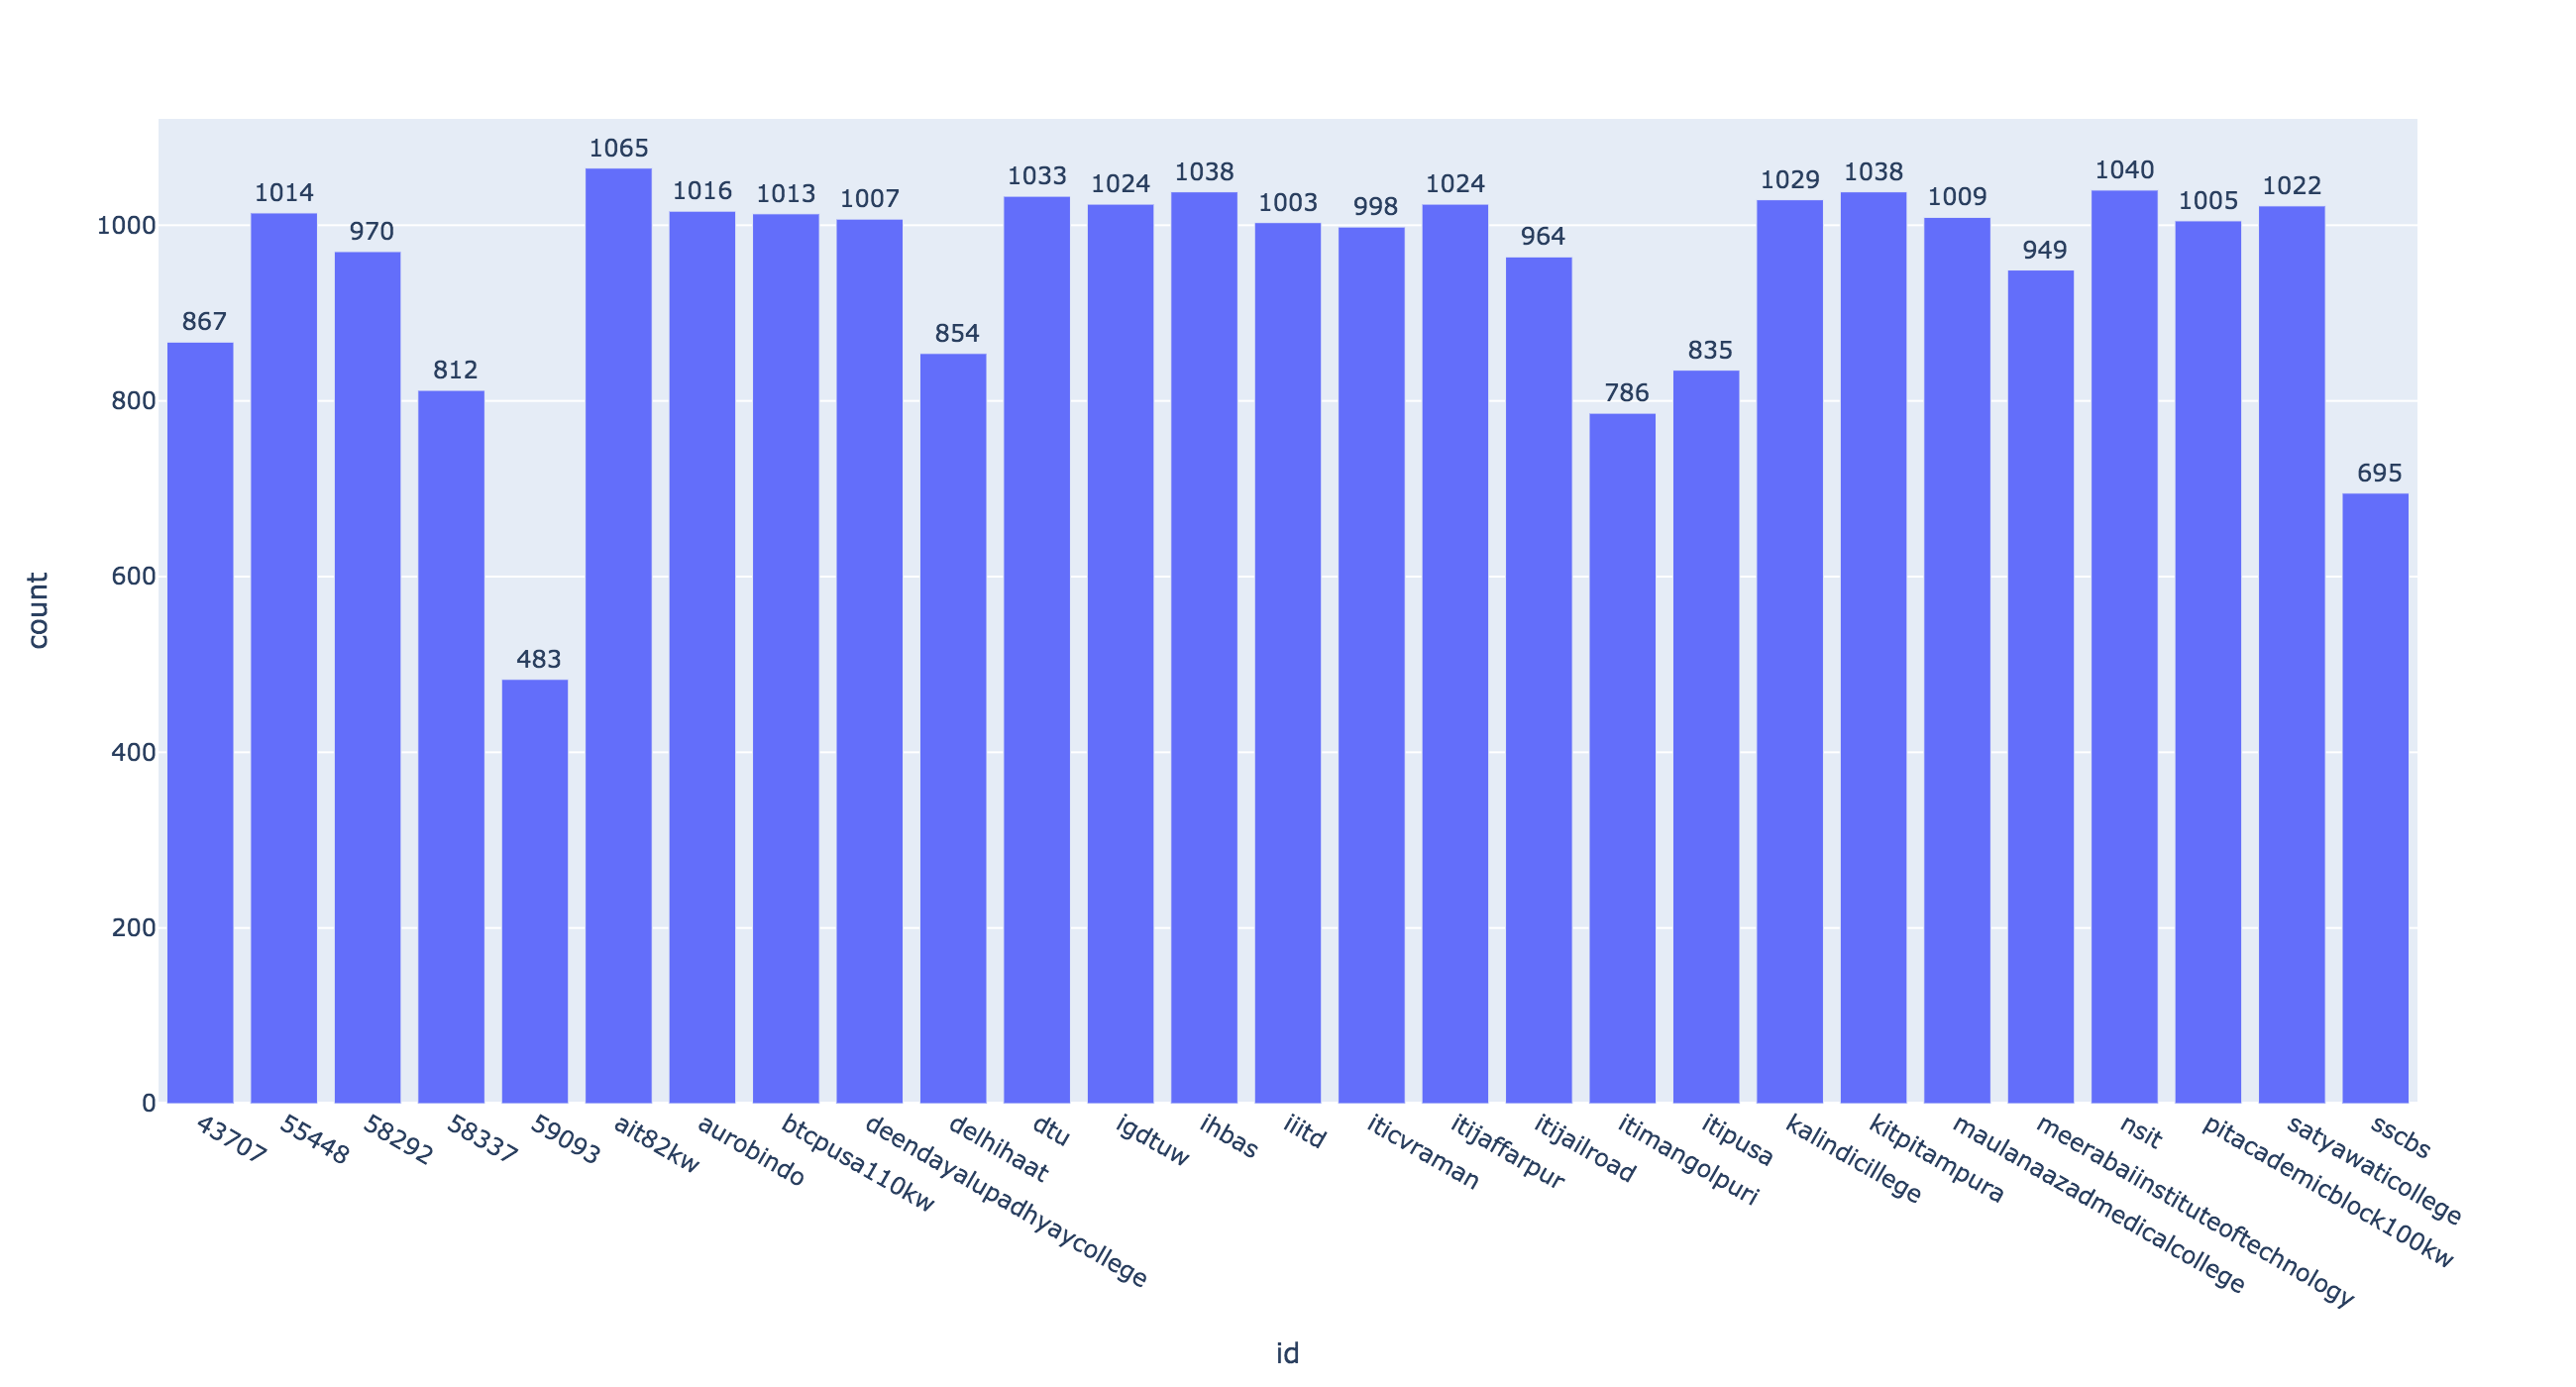

In [40]:
show_image(fig_tr,1300, 700)

In [16]:
# pivotting data frame by calculating the 
df_sample = pd.pivot_table(df, values='energy',index=["date", "id"], aggfunc = ["count"])
df_sample = pd.DataFrame(df_sample.to_records())
df_sample.head()

,date,id,"('count', 'energy')"
0,2019-12-25,ait82kw,1
1,2019-12-25,aurobindo,1
2,2019-12-25,btcpusa110kw,1
3,2019-12-25,deendayalupadhyaycollege,1
4,2019-12-25,delhihaat,1


In [23]:
fig_1 = px.bar(df_sample, x='date', y="('count', 'energy')", color = 'id', color_discrete_sequence= px.colors.qualitative.Alphabet)
fig_1.update_layout(autosize=False,width=1150, height= 680, 
                    title='Number of Observations for Each Day',
                    yaxis=go.layout.YAxis(
                        title_text="Number of Observations",
                        ticktext=df_sample["('count', 'energy')"],
                        dtick = 100,
                        titlefont=dict(size=15)),
                    xaxis = go.layout.XAxis(dtick = [1,2],
                                            title_text="Date",
                                            titlefont=dict(size=15)),
                        )

fig_1.show()

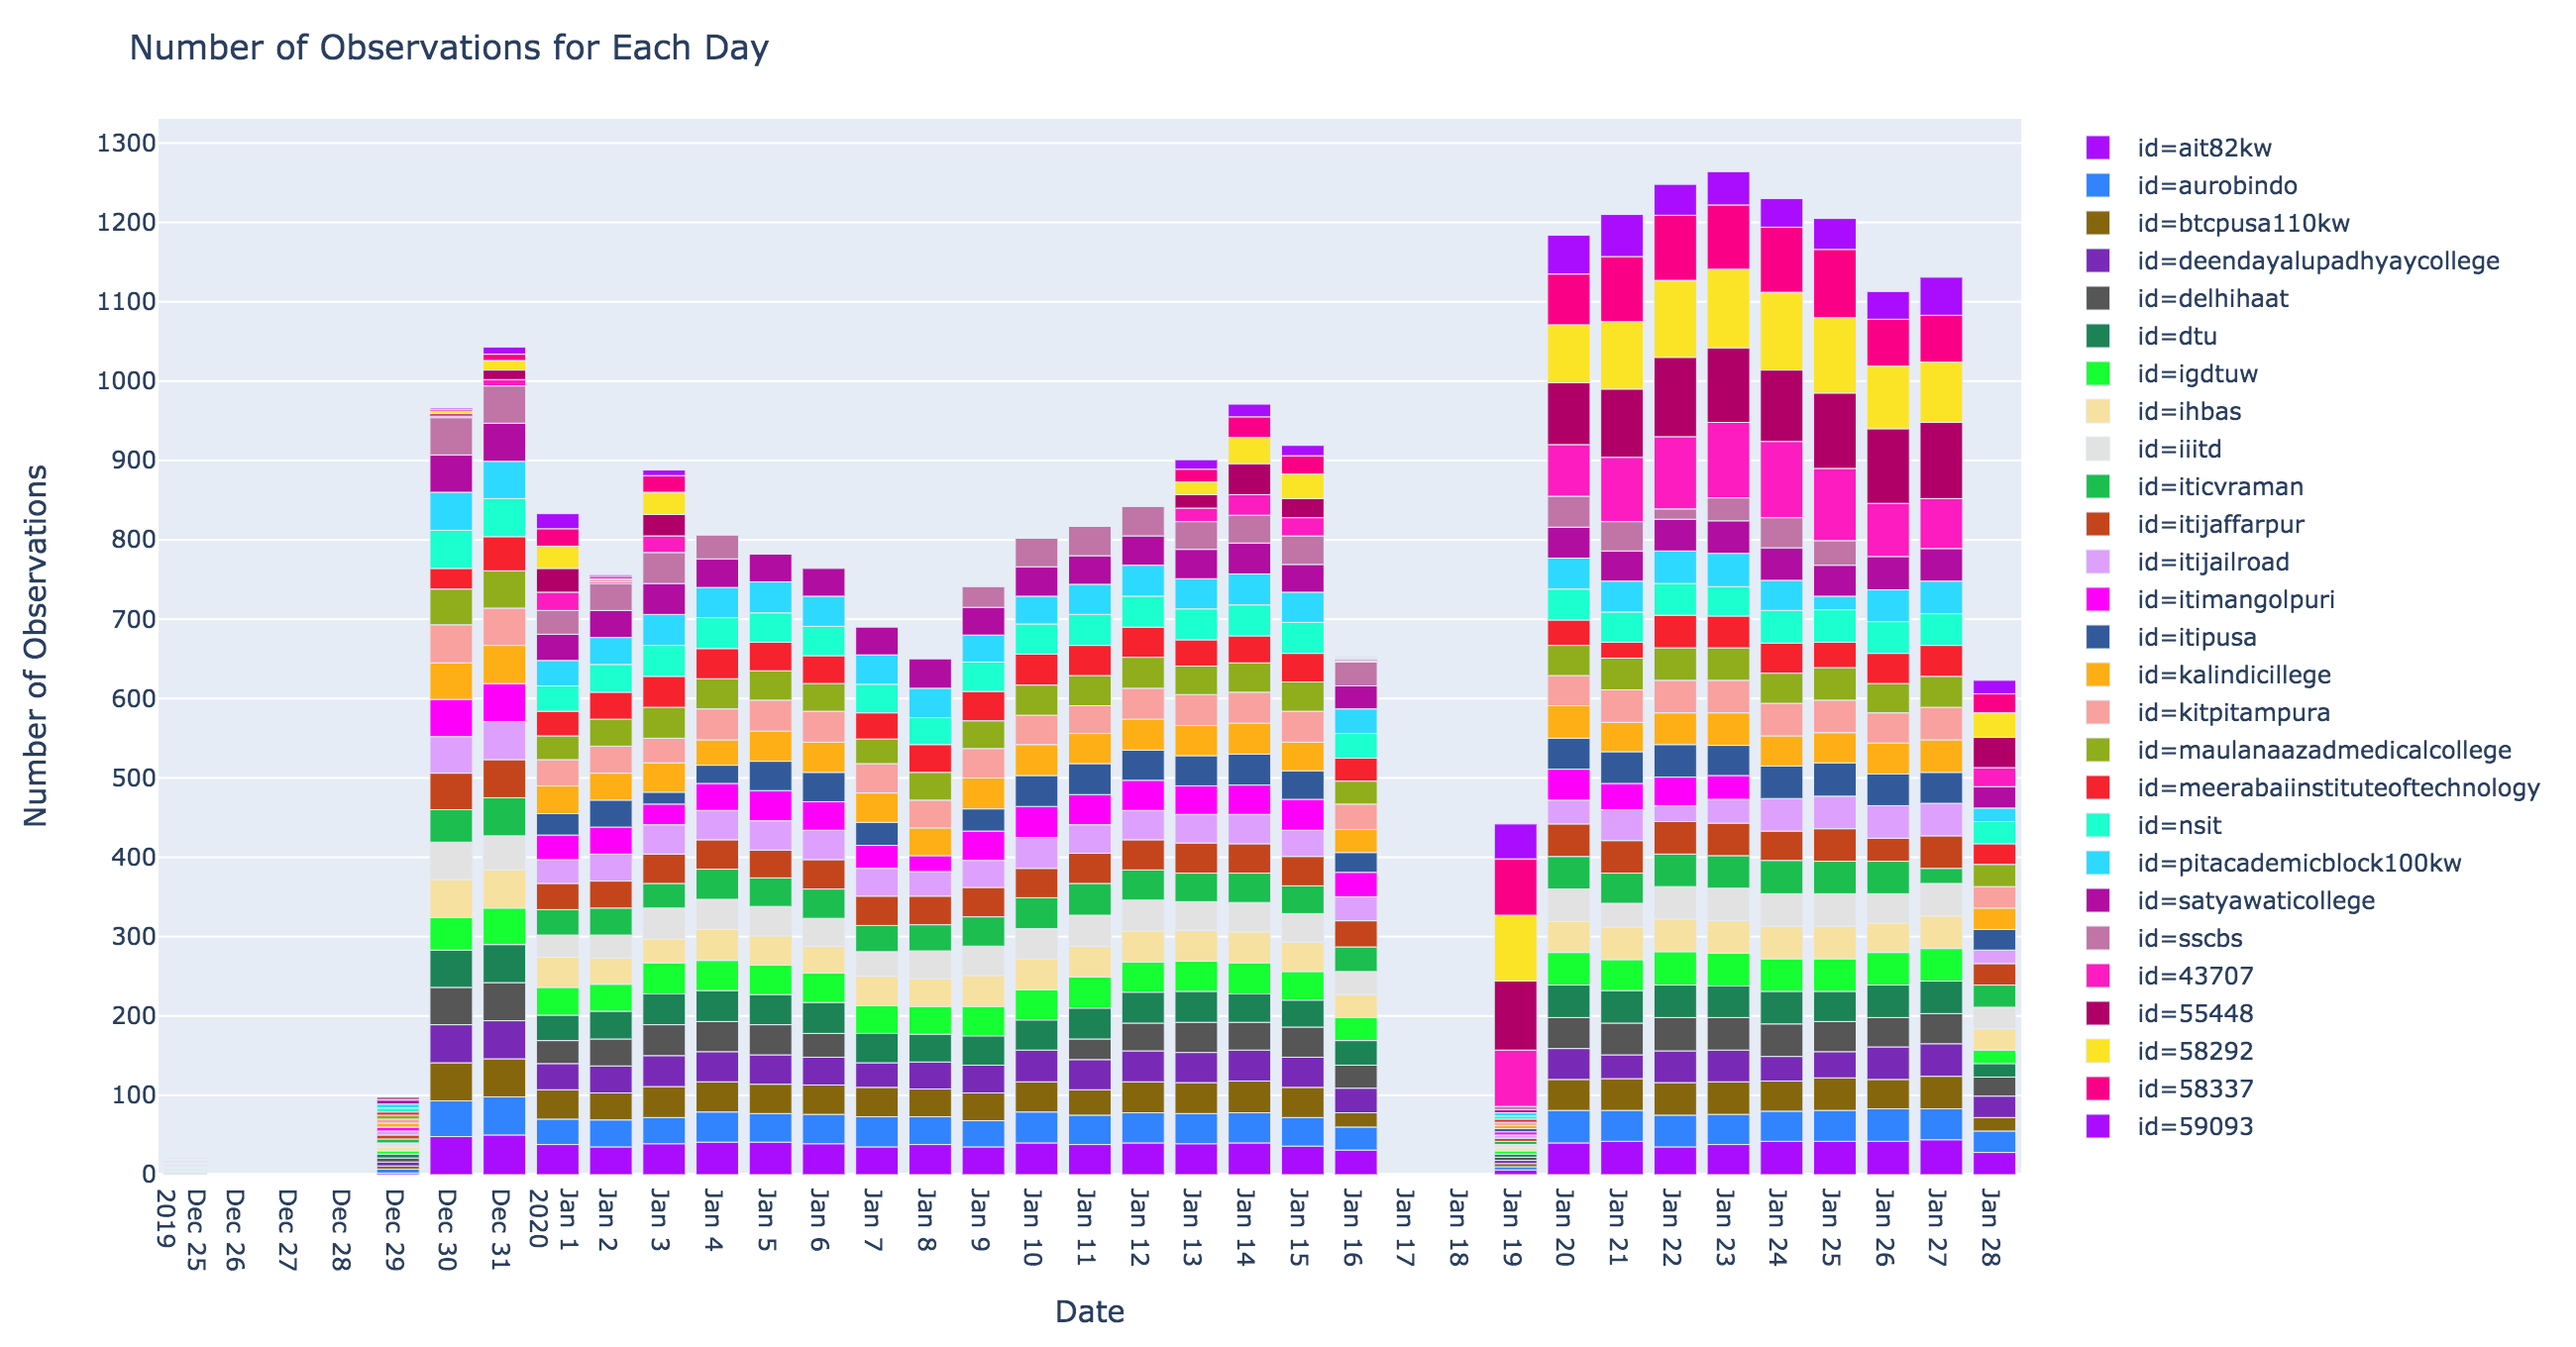

In [41]:
show_image(fig_1, 1300, 680)

### Analysis of Missing Values

In this session, we will analyze the pattern for missing values. In our dataset, there are 5035 missing values for power estimates. It means about 25% of the measurement of power is missing which is considerably high. To solve this issue, it is necessary to investigate the details of where these values occur. It can be observed from the plot that about 425 observations were missing in Dec 30-31 and Jan 20-28. The plot also depicts the contribution of each station for missing values.

The graph below shows the fraction of missing values for each station. To our surprise "meerabainstitueoftechnology" and “sscbs” solar stations have 40% and 30% of missing values which means that the data for these stations are highly inaccurate. The other stations' performances are consistent. Some stations have a low amount of missing values providing one of the means of high accuracy, and the other stations have about 18-20% of missing values which is quite accurate.

In [47]:
df_missing = df[df['power'].isnull()]
print(len(df_missing))
df_missing = pd.pivot_table(df_missing, index = ['id', 'date'], values = "energy", aggfunc='count')
df_missing = pd.DataFrame(df_missing.to_records())
df_missing.head()

5035
26230


,id,date,energy
0,43707,2019-12-30,2
1,43707,2019-12-31,1
2,43707,2020-01-20,1
3,55448,2019-12-30,3
4,55448,2019-12-31,10


In [44]:
fig_2 = px.bar(df_missing, x='date', y="energy", color = 'id', color_discrete_sequence= px.colors.qualitative.Alphabet)
fig_2.update_layout(title='Number of Missing Observations for Each Day',
                    autosize=False, width=1150, height= 680, 
                    yaxis=go.layout.YAxis(
                        title_text="Observations",
                        ticktext=df_sample["('count', 'energy')"],
                        dtick = 25,
                        titlefont=dict(size=15)),
                    xaxis = go.layout.XAxis(dtick = [1,2],
                                            title_text="Date",
                                            titlefont=dict(size=15)),
                        )

fig_2.show()

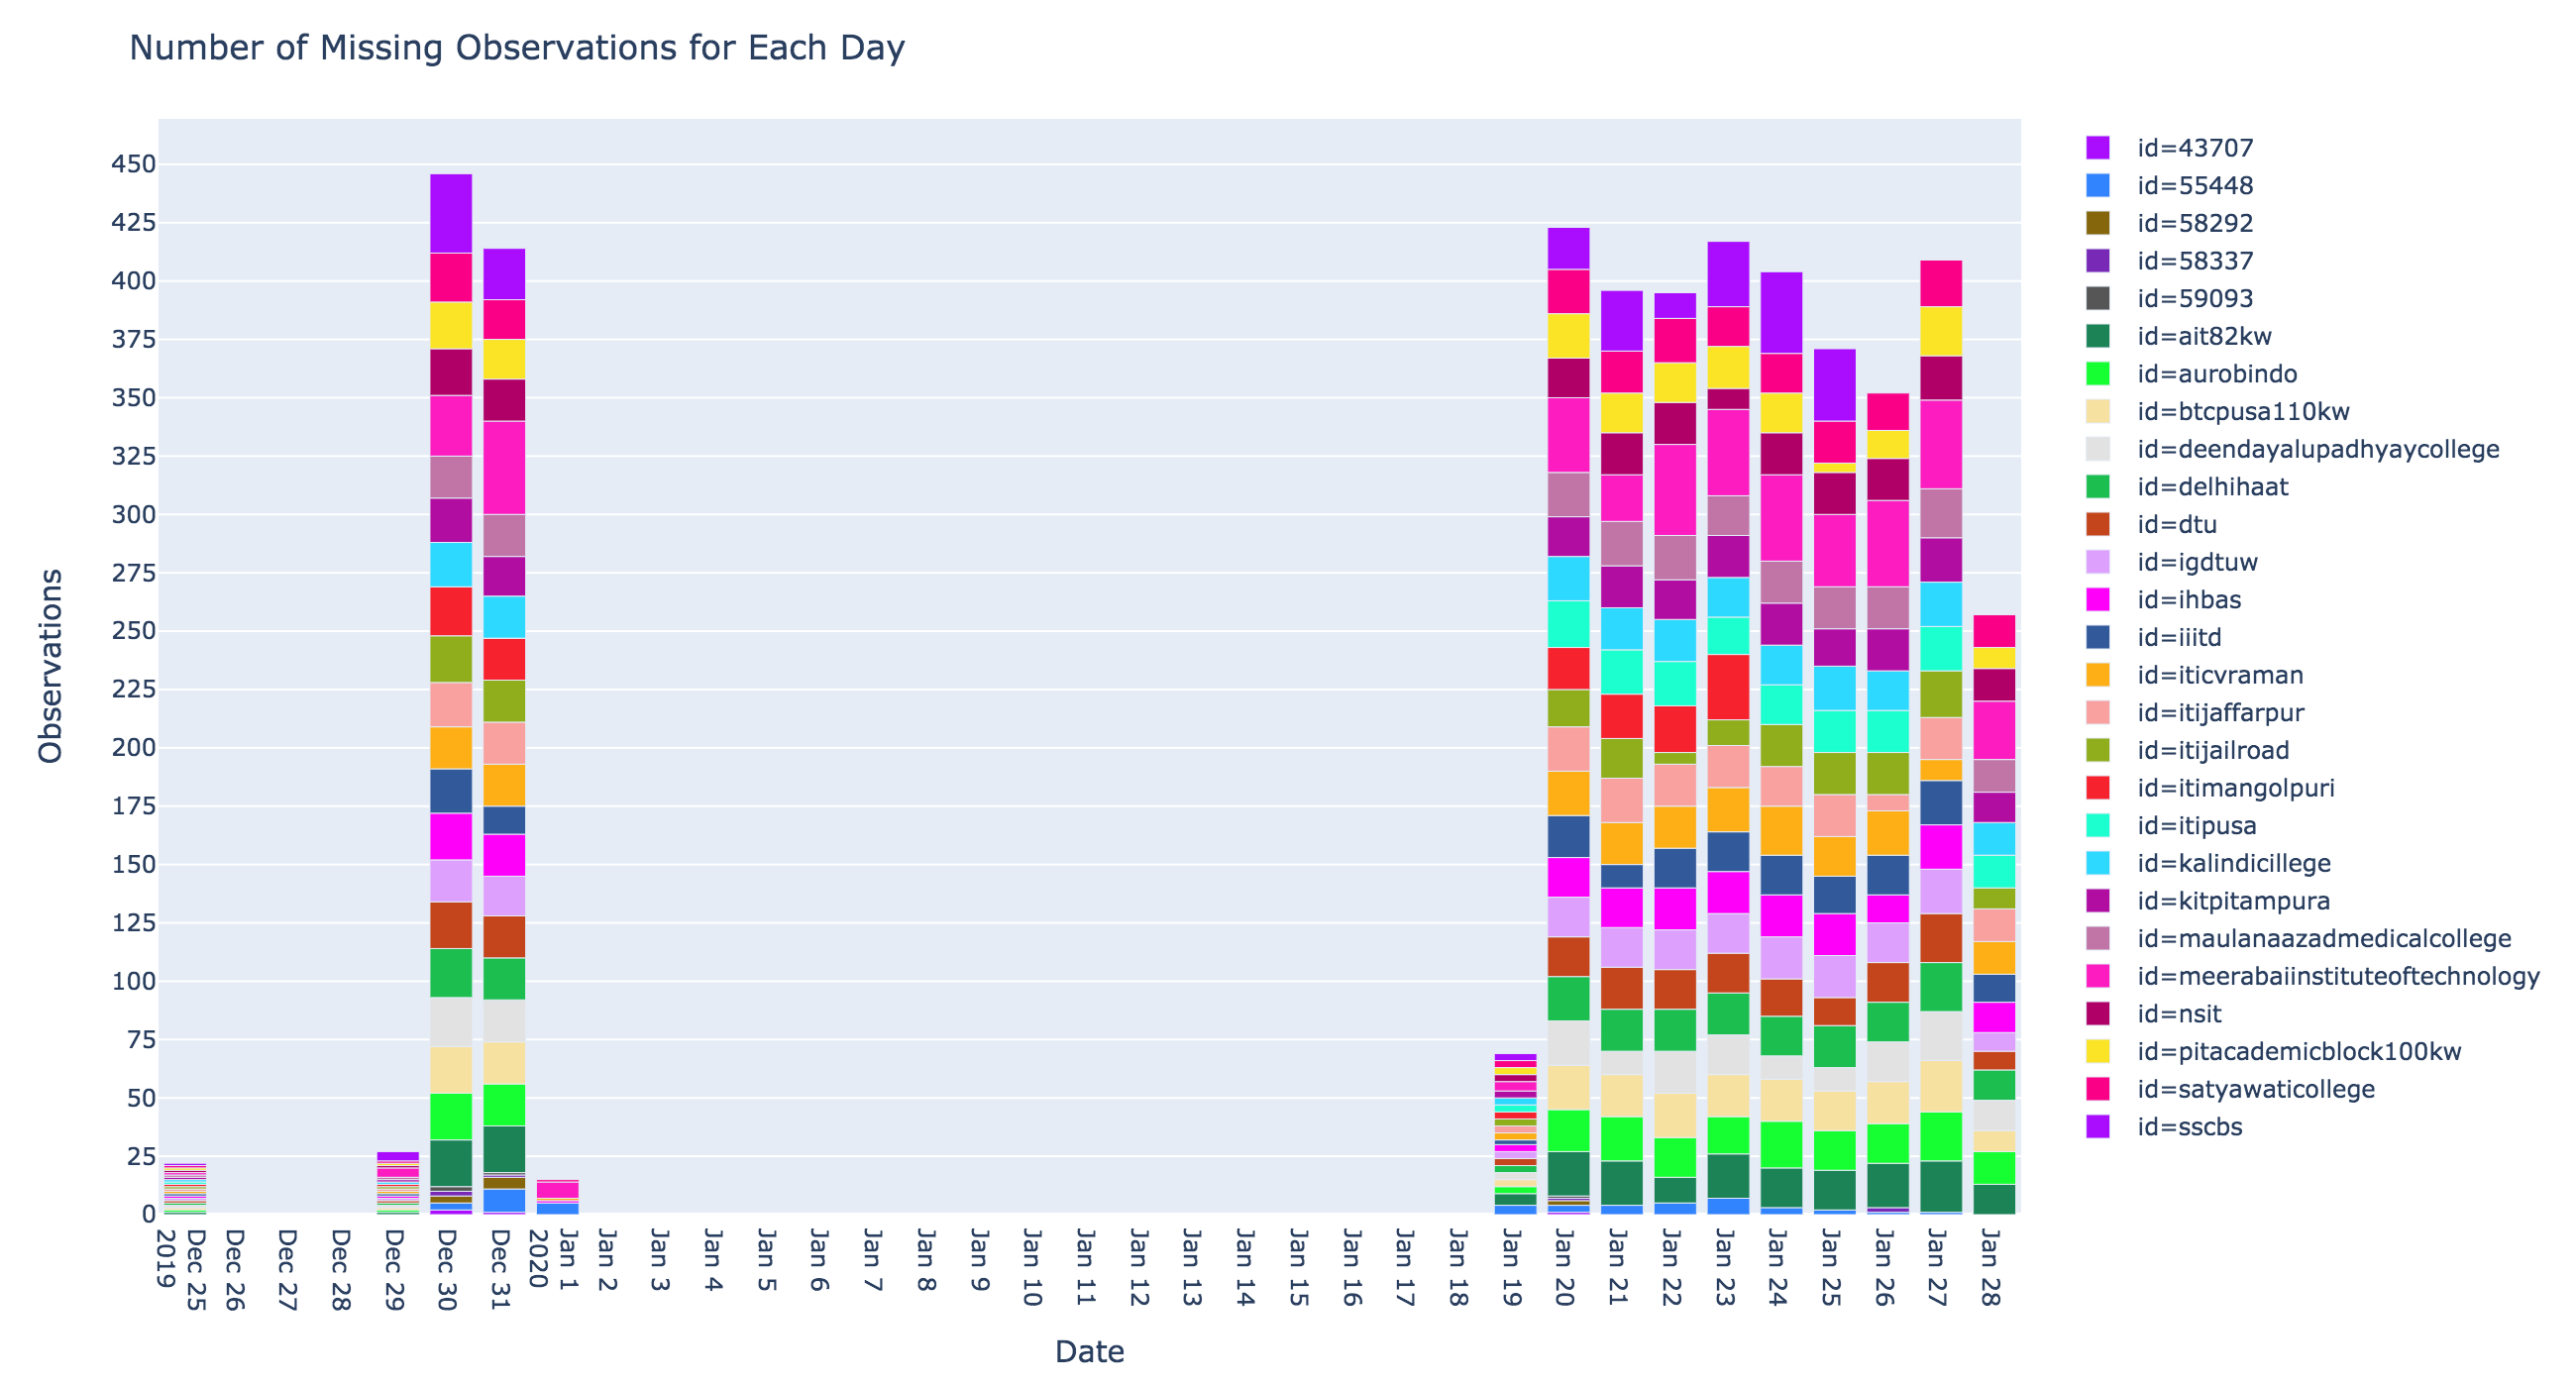

In [48]:
show_image(fig_2, 1300, 700)

In [49]:
df_missing_st = pd.pivot_table(df_missing, index = 'id', values = 'energy', aggfunc = "sum")
df_missing_st = pd.DataFrame(df_missing_st.to_records())
df_missing_st = df_missing_st.rename(columns = {'energy':'missing'})
df_count = df_count.rename(columns = {'count':'total'})
df_missing_st = pd.merge(df_missing_st, df_count)
df_missing_st['percent'] = round(df_missing_st['missing']/df_missing_st['total']*100, 1)

In [50]:
fig = go.Figure(data=[
    go.Bar(name='Missing', x=df_missing_st['id'], y=df_missing_st['missing'], text=[str(x) + "%" for x in df_missing_st['percent']],
            textposition='auto', textfont_size=12, marker_color='red'),
    go.Bar(name='Total', x=df_missing_st['id'], y=(df_missing_st['total']-df_missing_st['missing']), marker_color='blue')
])
# Change the bar mode
fig.update_layout(barmode='stack', title='Fraction of Missing Values for Each Station',
                    autosize=False, width=1000, height= 680, 
                    yaxis=go.layout.YAxis(
                        title_text="Observations",
                        ticktext=df_sample["('count', 'energy')"],
                        dtick = 100,
                        titlefont=dict(size=15)),
                    xaxis = go.layout.XAxis(dtick = [1,2],
                                            title_text="Date",
                                            titlefont=dict(size=15)),
                         )
fig.show()

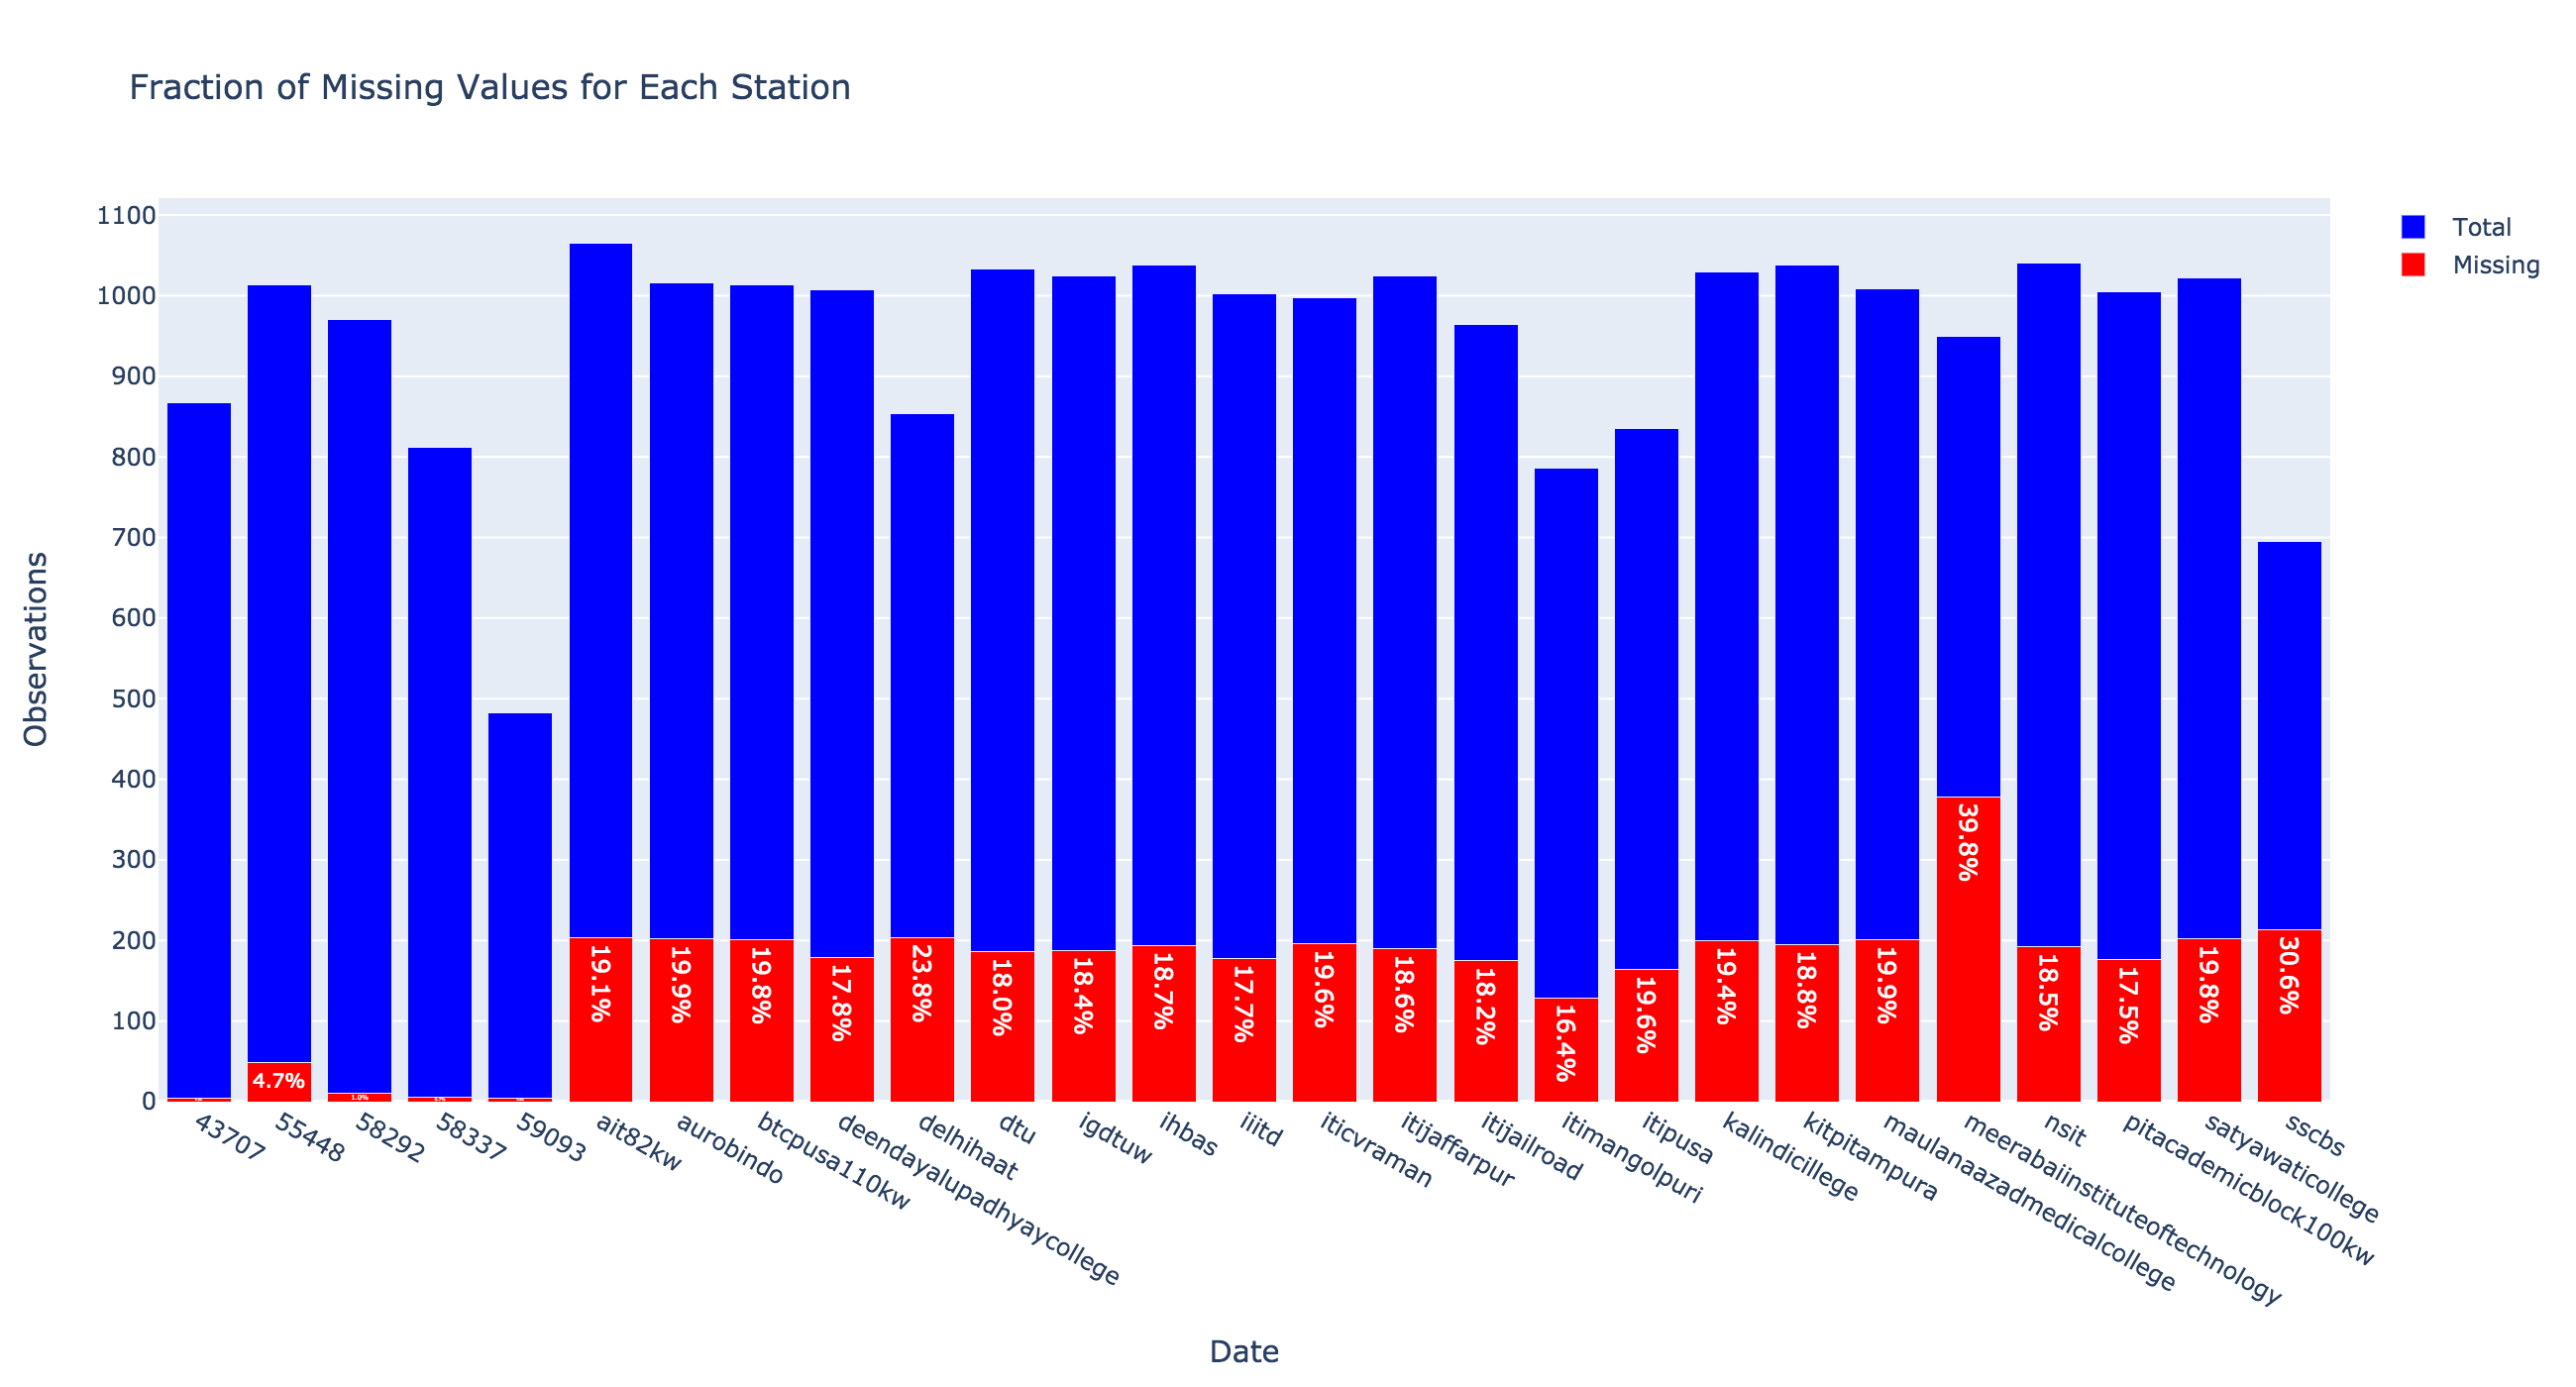

In [52]:
show_image(fig, 1300, 700)

 ### Energy Output & Capacity Utilisation Factor (CUF

These plots provide the most important information about solar stations which are energy and efficiency. The energy output varies from 11 kWh to 2100 kWh. Generally, the average daily electricity consumption for a residential utility customer is about 30 kWh. The energy output depends on the size and number of solar panels. Based on this fact, "dtu" provides a great amount of energy which can cover approximately 60-70 households' daily electricity demand.

In [25]:
df['timestamp'] = df['date'].map(lambda x: x.strftime('%s'))
daily_df = df.copy()
daily_df = daily_df[['id', 'date','capacity', 'timestamp', 'power', 'energy']]
daily_df_agg = daily_df.groupby( ['date', 'id','capacity','timestamp']).agg(['sum', 'mean', 'max', 'count'])
daily_df_agg = daily_df_agg.reset_index()
level_0 = daily_df_agg.columns.droplevel(0)
level_1 = daily_df_agg.columns.droplevel(1)
level_0 = ['' if x == '' else '-' + x for x in level_0]
daily_df_agg.columns = level_1 + level_0
daily_df_agg.rename_axis(None, axis=1)
less = daily_df_agg[daily_df_agg['power-count'] < 15] #threshhold
daily_df_agg = daily_df_agg[daily_df_agg['power-count'] > 15]
null = daily_df_agg[daily_df_agg['power-sum']==0]
daily_df_agg = daily_df_agg[daily_df_agg['power-sum']!=0]
daily_df_agg.head()

,date,id,capacity,timestamp,power-sum,power-mean,power-max,power-count,energy-sum,energy-mean,energy-max,energy-count
53,2019-12-30,ait82kw,60.0,1577692800,444.429997,17.093461,42.948002,26,1497.480003,33.277333,158.589996,45
56,2019-12-30,aurobindo,49.3,1577692800,232.851998,12.255368,27.115999,19,803.119988,20.592820,92.760002,39
57,2019-12-30,btcpusa110kw,110.0,1577692800,639.964999,22.855893,68.392998,28,2069.769972,43.120208,229.500000,48
58,2019-12-30,deendayalupadhyaycollege,151.2,1577692800,664.517009,34.974579,74.155998,19,2389.509996,66.375278,263.059998,36
60,2019-12-30,delhihaat,50.0,1577692800,187.037999,6.927333,19.993000,27,707.100004,15.044681,70.180000,47


In [31]:
fig_maximum = px.scatter(daily_df_agg, x='date', y='energy-max', color='id', render_mode='svg', color_discrete_sequence= px.colors.qualitative.Light24)
fig_maximum.update_layout(title='Maximum kWh value per energy aspect')
fig_maximum.update_layout(autosize=False,width=1100, height= 680, 
                    title='Maximum kWh value per energy aspect',
                    yaxis=go.layout.YAxis(
                        title_text="Energy (kWh)",
                        dtick = 100,
                        titlefont=dict(size=15)),
                    xaxis = go.layout.XAxis(dtick = [1,2],
                                            title_text="Date",
                                            titlefont=dict(size=15)),
                        )

fig_maximum.show() # interactive

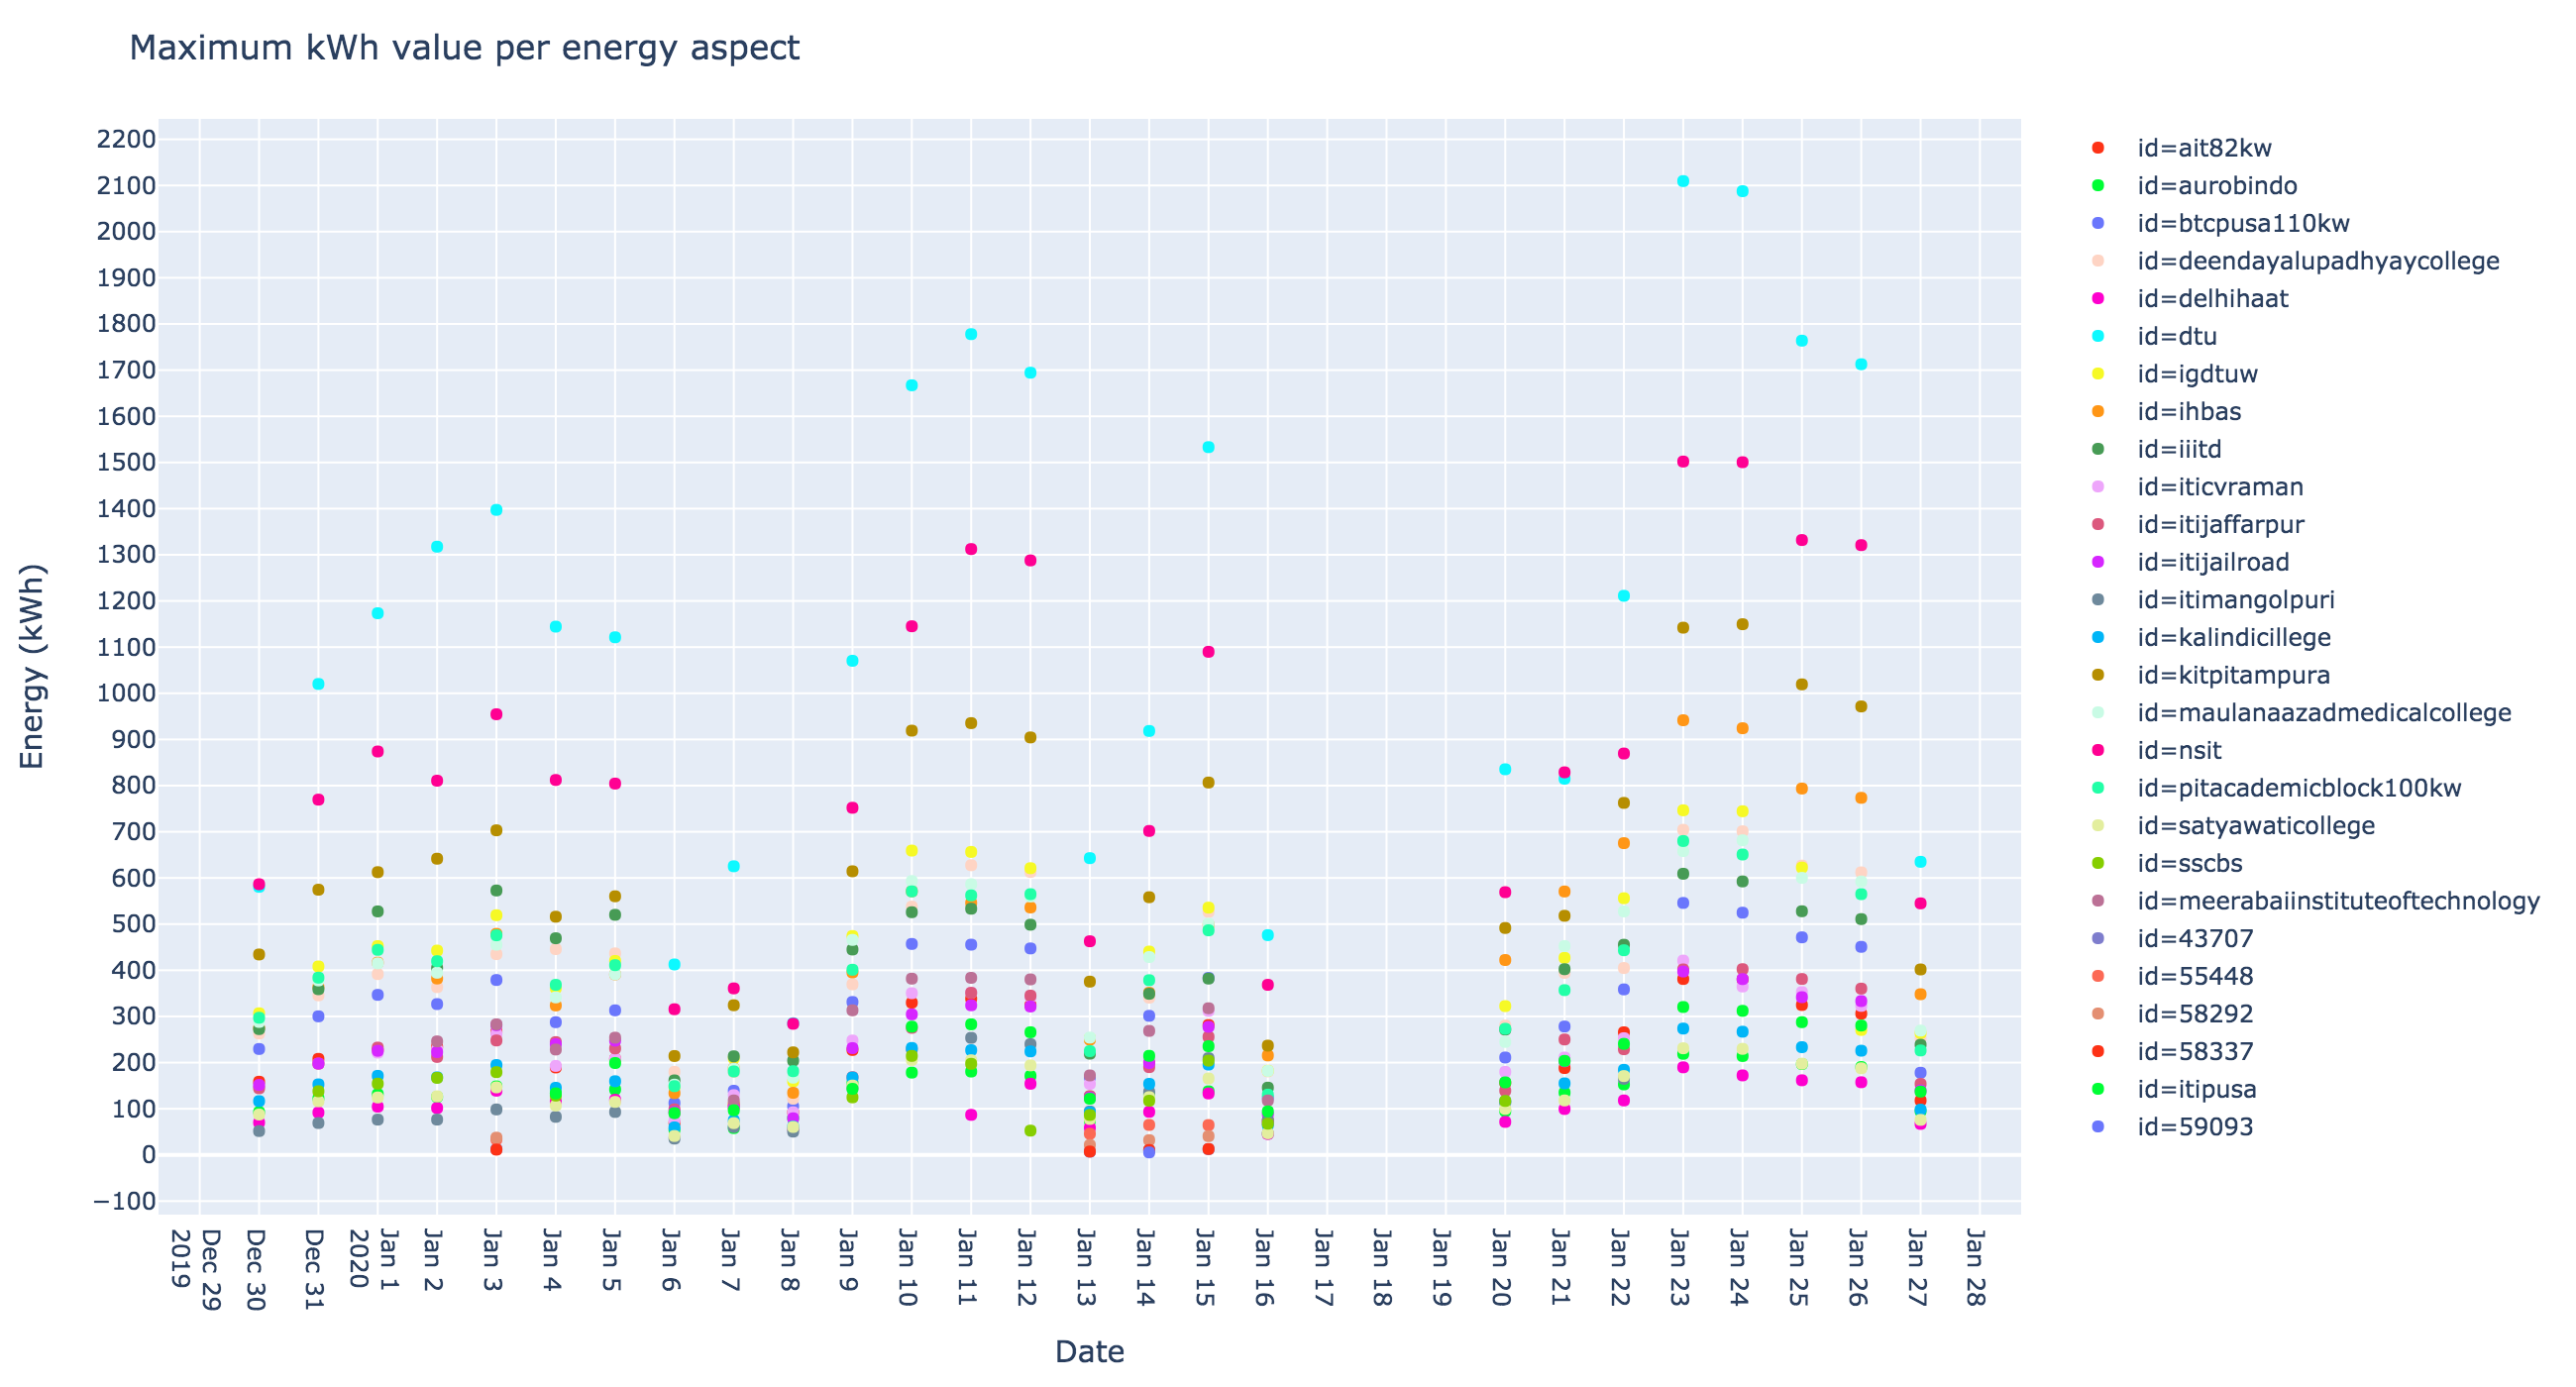

In [42]:
show_image(fig_maximum, 1300, 700) # static

The efficiency of a PV power plant is often denominated by a metric called the capacity utilization factor. It is the ratio of the actual output from a solar plant over the year to the maximum possible output from it for a year under ideal conditions. The capacity utilization factor is usually expressed in percentage. Capacity Utilisation Factor (CUF) =Energy measured (kWh) / (365 x 24 x Installed capacity of the plant). Studies from the Ministry of Non-renewable energy (MNRE) India reports that the average capacity utilization factor of solar PV plants in India is in the range of 15-19%.

Due to limited number of observations, we decided to estimate CUF value on a daily basis. We modified the formula to Capacity Utilisation Factor (CUF) =Energy measured (kWh) / (24 x Installed capacity of the plant).

According to the plot, we could observe that the CUF value varies from 1.7% to 26.5%. In contrast with the above graph "ait82kw" has the highest CUF value, which on average generates 250kWh. The highest energy-generating "dtu" has on average 13% CUF value. Based on standards, this estimation is nearly the average capacity utilization factor of solar PV plants in India.

In [53]:
daily_df_agg['cuf'] = daily_df_agg['energy-max']/(24*daily_df_agg['capacity'])*100
daily_df_agg
fig_maximum = px.scatter(daily_df_agg, x='date', y='cuf', color='id', render_mode='svg', color_discrete_sequence= px.colors.qualitative.Alphabet)
fig_maximum.update_layout(title='CUF value per energy aspect',
                          autosize=False,width=1100, height= 680, 
                          yaxis=go.layout.YAxis(
                              title_text="Percentage(%)",
                              dtick = 2,
                              titlefont=dict(size=15)),
                          xaxis = go.layout.XAxis(dtick = [1,2],
                                                  title_text="Date",
                                                  titlefont=dict(size=15)),)
fig_maximum.show()

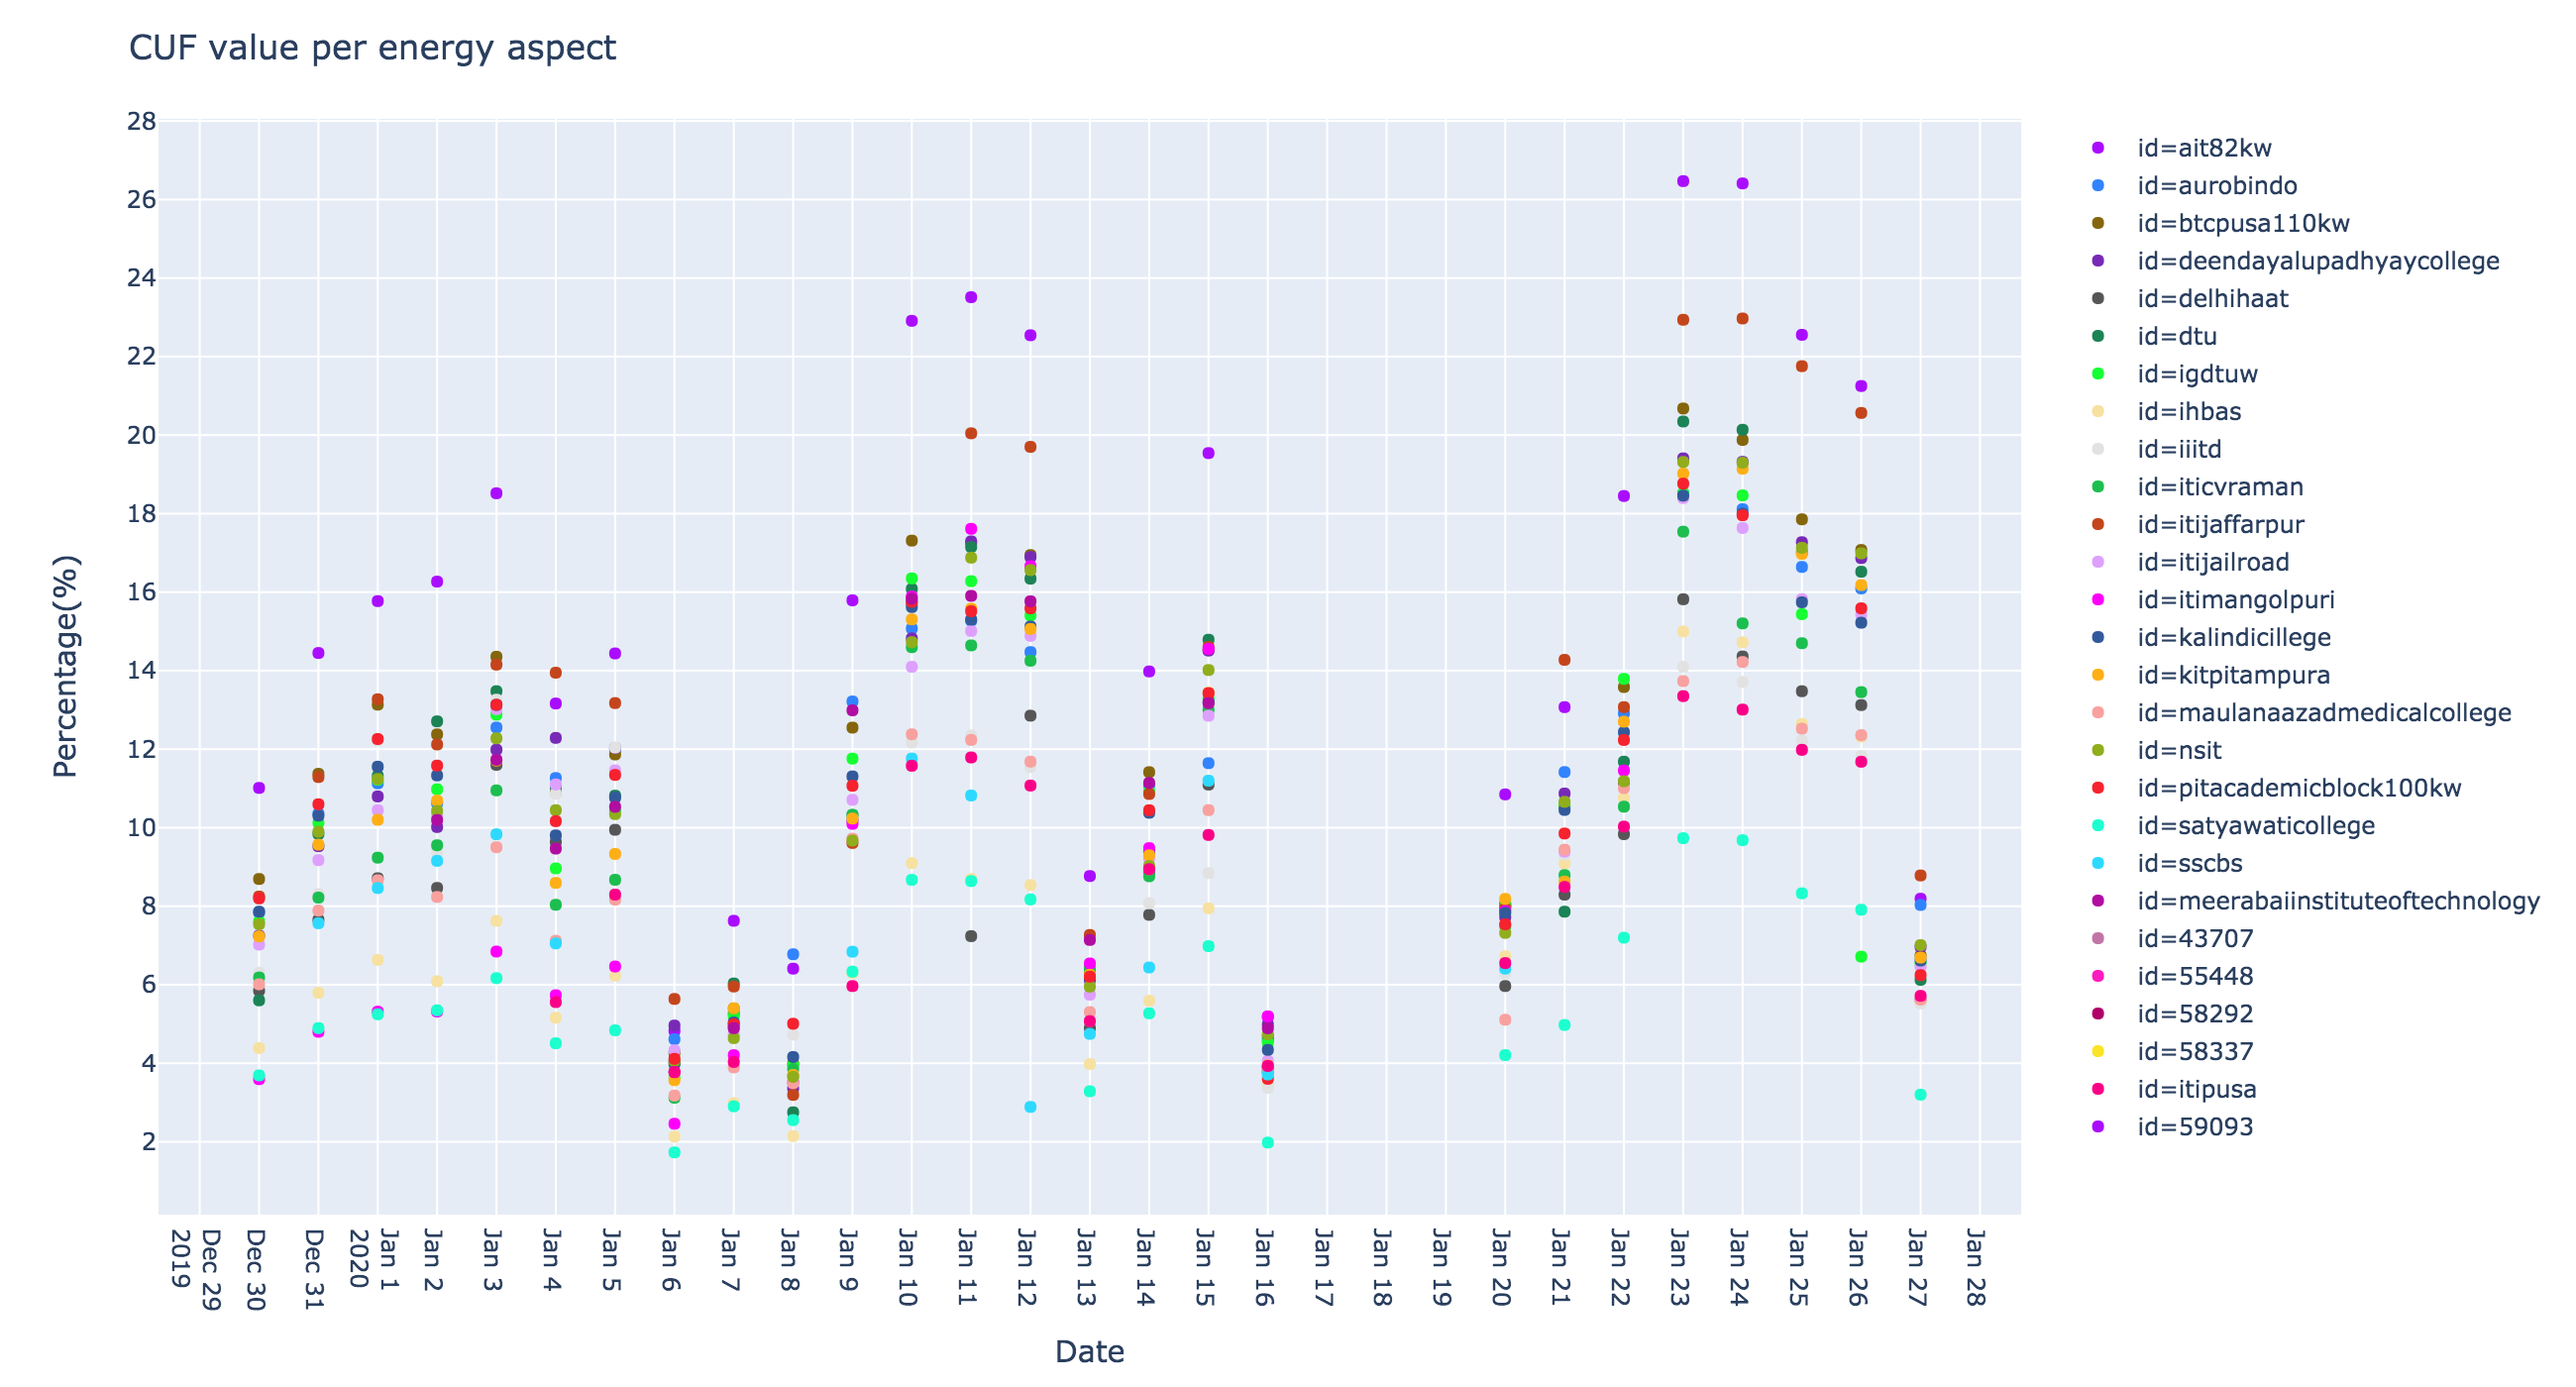

In [55]:
show_image(fig_maximum, 1300, 700)

## Conclusion

This blog is dedicated to exploratory data analysis by using Plotly data visualization tools. EDA is an initial and crucial stage to the following machine learning model. From the analysis above we came up with several interesting inferences. First of all, we removed the variable which has smaller than 15 observations for each date. Since we assume that the variable does not represent in a right way the performance of the solar panel for that date. Secondly, we removed the energy variable showing zero, as energy output is incremental variable and it cannot be zero. Lastly, we removed the stations which have above 30% of missing power values. We assumed that a high amount of missing values indicates poor accuracy of the variable. We believe that all these feature engineering will provide a more robust machine learning model. The next stage of this project will be the Anomaly Detection and Training Machine Learning Model.

## References

1. https://www.nwwindandsolar.com/solar-power-in-seattle-and-the-northwest/how-do-solar-systems-produce-energy/
2. http://www.solarmango.com/ask/2015/10/20/what-is-cuf-and-how-is-it-relevant-to-solar-farms/